Notes taken from [ML Mastery](https://machinelearningmastery.com/modeling-pipeline-optimization-with-scikit-learn/)

As an example, I'll use the [Ecoli Dataset](https://archive.ics.uci.edu/ml/datasets/Ecoli) from the [UCI ML Repository](https://archive.ics.uci.edu/ml/datasets.php)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

from sklearn.model_selection import train_test_split # For train/test splits
from sklearn.neighbors import KNeighborsClassifier # The k-nearest neighbor classifier
from sklearn.feature_selection import VarianceThreshold # Feature selector
from sklearn.pipeline import Pipeline # For setting up pipeline
# Various pre-processing steps
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV # For optimization

# Get and Prep data

In [2]:
df = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/ecoli/ecoli.data',
    sep = '\s+',
    header=None
    )
df.head()

,0,1,2,3,4,5,6,7,8
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp


In [3]:
# the first column of ecoli dataset is the sequence name, the last column is the class
# label, and the columns in between are features.

X = df.iloc[:,1:-1]
y = df.iloc[:,-1:]

In [4]:
encoder = preprocessing.LabelEncoder()
y = encoder.fit_transform(np.ravel(y)) # encodes y from string labels into numerical classes
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 3, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X,  
    y, 
    test_size=1/3,
    random_state=0)
print(X_train.shape)
print(X_test.shape)

(224, 7)
(112, 7)


# Basic ML Pipeline

In [6]:
pipe = Pipeline([
    ('scaler', StandardScaler()), # transform the data to zero mean and unit variance 
    ('selector', VarianceThreshold()), # discarding features whose variance is less than a certain defined threshold
    ('classifier', KNeighborsClassifier()) # classifier of choice
])

In [7]:
# fit the model & see performance
pipe.fit(X_train, y_train)
 
print('Training set score: ' + str(pipe.score(X_train,y_train)))
print('Test set score: ' + str(pipe.score(X_test,y_test)))

Training set score: 0.8794642857142857
Test set score: 0.8392857142857143


# Tuning the pipeline - hyperparameter search
* We can search for the best scalers. Instead of just the StandardScaler(), we can try MinMaxScaler(), Normalizer() and MaxAbsScaler().
* We can search for the best variance threshold to use in the selector, i.e., VarianceThreshold().
* We can search for the best value of k for the KNeighborsClassifier().

The parameters variable below is a dictionary that specifies the key:value pairs.

Note the key must be written, with a double underscore __ separating the module name that we selected in the Pipeline() and its parameter. 

Note the following:

* The scaler has no double underscore, as we have specified a list of objects there.
* We would search for the best threshold for the selector, i.e., VarianceThreshold(). Hence we have specified a list of values [0, 0.0001, 0.001, 0.5] to choose from.
* Different values are specified for the n_neighbors, p and leaf_size parameters of the KNeighborsClassifier().


In [8]:
parameters = {
    'scaler': [StandardScaler(), MinMaxScaler(),Normalizer(), MaxAbsScaler()],
    'selector__threshold': [0, 0.001, 0.01],
    'classifier__n_neighbors': [1, 3, 5, 7, 10],
    'classifier__p': [1, 2],
    'classifier__leaf_size': [1, 5, 10, 15]
}

grid = GridSearchCV(pipe, parameters, cv=2).fit(X_train, y_train) # brute force!
 
print('Training set score: ' + str(grid.score(X_train, y_train)))
print('Test set score: ' + str(grid.score(X_test, y_test)))

/home/kfchou/miniconda3/envs/deeplearningbasics/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


Training set score: 0.8928571428571429
Test set score: 0.8571428571428571


## Get the best set of results

In [9]:
# Access the best set of parameters
best_params = grid.best_params_
print(best_params)
# Stores the optimum model in best_pipe
best_pipe = grid.best_estimator_
print(best_pipe)

{'classifier__leaf_size': 1, 'classifier__n_neighbors': 7, 'classifier__p': 2, 'scaler': StandardScaler(), 'selector__threshold': 0}
Pipeline(steps=[('scaler', StandardScaler()),
                ('selector', VarianceThreshold(threshold=0)),
                ('classifier',
                 KNeighborsClassifier(leaf_size=1, n_neighbors=7))])


## Visualize the grid search results

In [10]:
result_df = pd.DataFrame.from_dict(grid.cv_results_, orient='columns')
result_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__leaf_size,param_classifier__n_neighbors,param_classifier__p,param_scaler,param_selector__threshold,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003940,0.000339,0.006157,0.000333,1,1,1,StandardScaler(),0,"{'classifier__leaf_size': 1, 'classifier__n_ne...",0.830357,0.767857,0.799107,0.031250,329
1,0.003584,0.000547,0.005476,0.000262,1,1,1,StandardScaler(),0.001,"{'classifier__leaf_size': 1, 'classifier__n_ne...",0.830357,0.767857,0.799107,0.031250,329
2,0.003399,0.000503,0.005471,0.000091,1,1,1,StandardScaler(),0.01,"{'classifier__leaf_size': 1, 'classifier__n_ne...",0.830357,0.767857,0.799107,0.031250,329
3,0.002957,0.000100,0.004949,0.000126,1,1,1,MinMaxScaler(),0,"{'classifier__leaf_size': 1, 'classifier__n_ne...",0.848214,0.741071,0.794643,0.053571,361
4,0.003072,0.000248,0.004855,0.000133,1,1,1,MinMaxScaler(),0.001,"{'classifier__leaf_size': 1, 'classifier__n_ne...",0.848214,0.741071,0.794643,0.053571,361


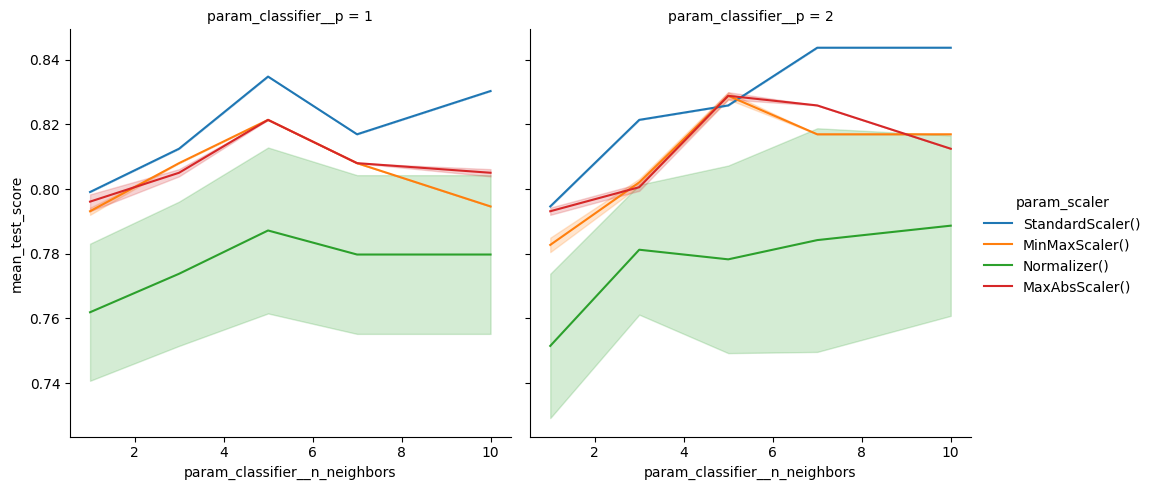

In [11]:
sns.relplot(
    data=result_df,
    kind='line',
    x='param_classifier__n_neighbors',
    y='mean_test_score',
    hue='param_scaler',
    col='param_classifier__p')
plt.show()

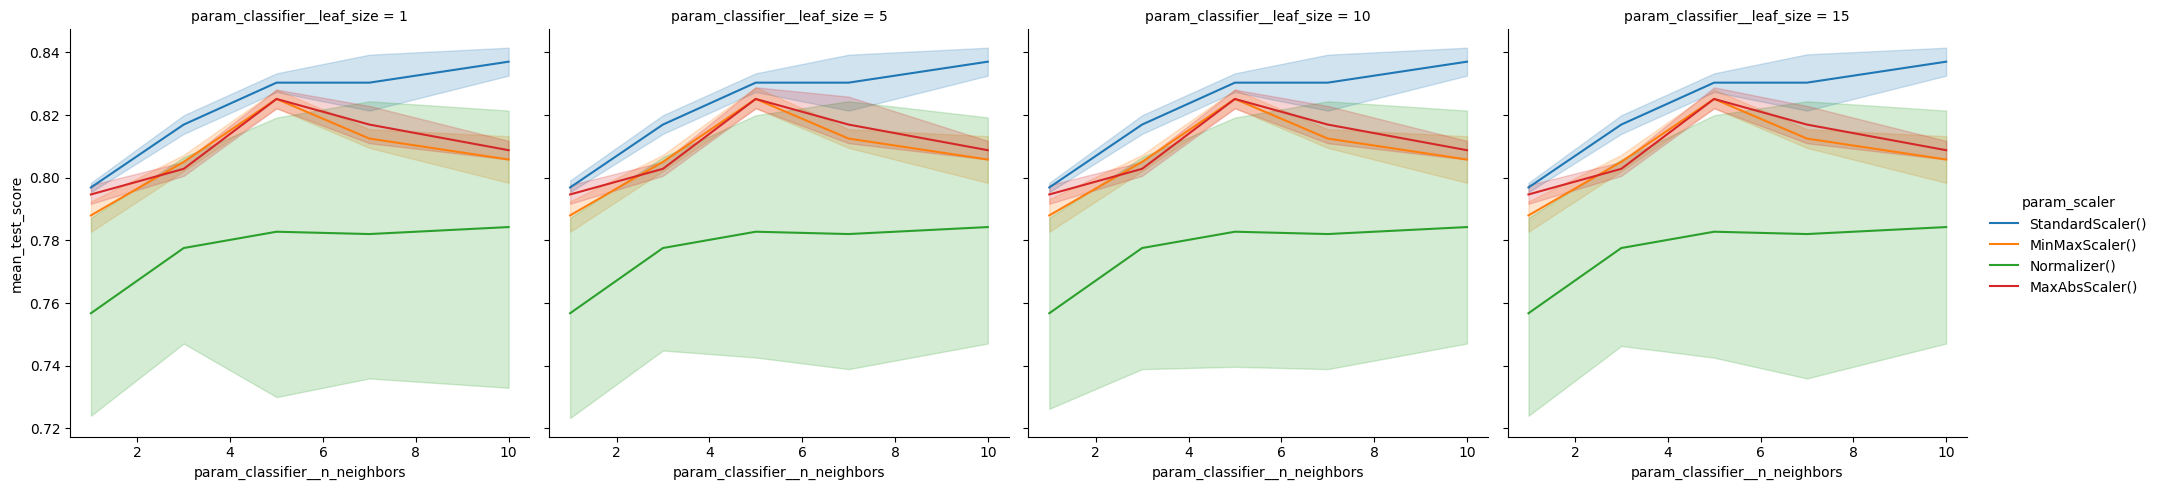

In [12]:

sns.relplot(data=result_df,
            kind='line',
            x='param_classifier__n_neighbors',
            y='mean_test_score',
            hue='param_scaler',
            col='param_classifier__leaf_size')
plt.show()

# Bonus - Try other models

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [14]:

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

/home/kfchou/miniconda3/envs/deeplearningbasics/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/kfchou/miniconda3/envs/deeplearningbasics/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/kfchou/miniconda3/envs/deeplearningbasics/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/kfchou/miniconda3/envs/deeplearningbasics/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/kfchou/miniconda3/envs/deeplearningbasics/lib/python3.10/site-packages/sklearn

LR: 0.764032 (0.045790)
LDA: 0.853360 (0.073100)
KNN: 0.849209 (0.080272)
CART: 0.813241 (0.094326)
NB: 0.777866 (0.067992)
SVM: 0.764229 (0.052801)


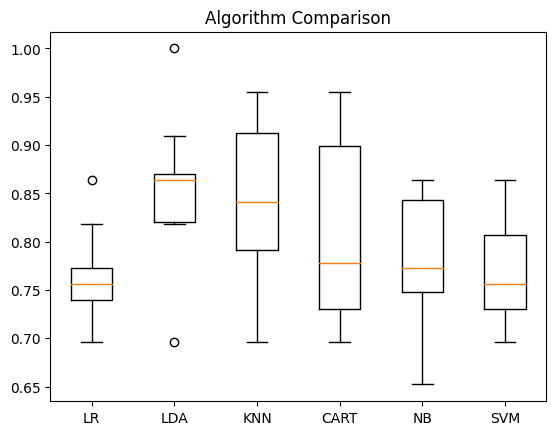

In [15]:
# looks like LDA and KNN are both decent classifiers for this dataset

# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()